In [32]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
Root = "D:\Traffic_Sign_Recognition"
os.chdir(Root)
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [33]:
#Storing data and labels in lists
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [34]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [35]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [36]:
#splitting data with the help of sklearn function train_test_split() into training and testing data.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [37]:

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [38]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [39]:

#Building CNN Model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [40]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
#Training of the model
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/10
981/981 [==============================] - 88s 89ms/step - loss: 1.8782 - accuracy: 0.5118 - val_loss: 0.4387 - val_accuracy: 0.8805
Epoch 2/10
981/981 [==============================] - 85s 86ms/step - loss: 0.5937 - accuracy: 0.8297 - val_loss: 0.1537 - val_accuracy: 0.9626
Epoch 3/10
981/981 [==============================] - 93s 94ms/step - loss: 0.3957 - accuracy: 0.8858 - val_loss: 0.1190 - val_accuracy: 0.9662
Epoch 4/10
981/981 [==============================] - 98s 100ms/step - loss: 0.3238 - accuracy: 0.9083 - val_loss: 0.0827 - val_accuracy: 0.9777
Epoch 5/10
981/981 [==============================] - 86s 87ms/step - loss: 0.2771 - accuracy: 0.9227 - val_loss: 0.0623 - val_accuracy: 0.9810
Epoch 6/10
981/981 [==============================] - 88s 90ms/step - loss: 0.2467 - accuracy: 0.9319 - val_loss: 0.0802 - val_accuracy: 0.9768
Epoch 7/10
981/981 [==============================] - 116s 119ms/step - loss: 0.2348 - accuracy: 0.9368 - val_loss: 0.0845 - val_accura

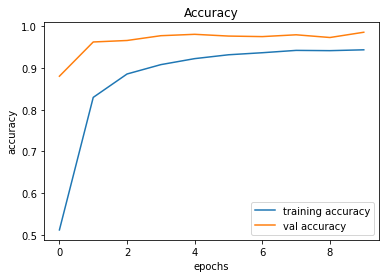

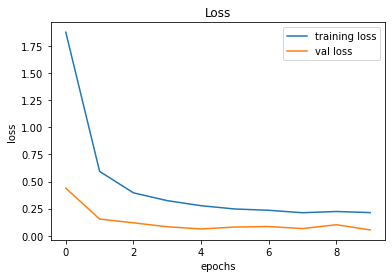

In [43]:
 #plotting graph for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [44]:
#Testing on test data
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = np.argmax(model.predict(X_test), axis=-1)

In [45]:
#Checking accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9503562945368171


In [46]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [47]:
#making predictions
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    pred = np.argmax(model.predict(X_test), axis=-1)
    return image,pred

Predicted traffic sign is:  Speed limit (70km/h)


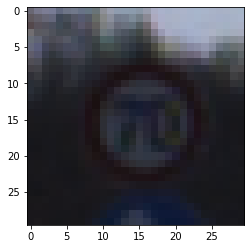

In [48]:
#sample image 00330.png
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00330.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Stop


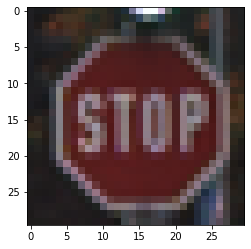

In [49]:
#sample image 00456.png
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00456.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  Stop


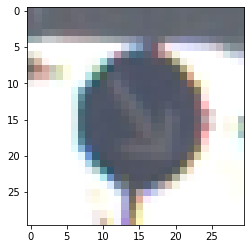

In [50]:
#sample image 00789.png
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00789.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted traffic sign is:  End of speed limit (80km/h)


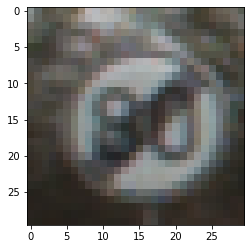

In [51]:
#sample image 00435.png
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00435.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()


Predicted traffic sign is:  Yield


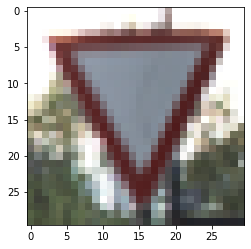

In [52]:
#sample image 00761.png
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00761.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()